## Chi-Square Test

The chi-square test is a statistical test used to determine whether there is a significant association between categorical variables. It compares the observed frequencies of categories in a dataset to the expected frequencies under a specific hypothesis.

The test statistic for the chi-square test is calculated using the formula:

\begin{equation}
\chi^2 = \sum{\frac{{(O_i - E_i)^2}}{{E_i}}}
\end{equation}

where:
- $\chi^2$ is the chi-square test statistic
- $O_i$ is the observed frequency for each category
- $E_i$ is the expected frequency for each category, which is determined based on the null hypothesis


The null hypothesis for the chi-square test is that there is no association between the categorical variables, meaning the observed frequencies match the expected frequencies.

The chi-square test statistic follows a chi-square distribution with degrees of freedom determined by the number of categories and the constraints imposed by the null hypothesis.

In [21]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

In [37]:
data = pd.DataFrame(
    {'Category': ['A', 'B' , 'C','A','B','C','B'],
     'Outcome' : ['true','false','true','false','true','true','true']}
)

contingency_table = pd.crosstab(data['Category'], data['Outcome'])

In [38]:
contingency_table

Outcome,false,true
Category,,
A,1,1
B,1,2
C,0,2


In [39]:
chi2_score, p_value, dof, expected = stats.chi2_contingency(contingency_table)

In [40]:
print(f"Chi-square test score = {chi2_score :.5f}")
print(f"p-value = {p_value :.5f}")
print(f"Excepted Frequencies")
print(expected)


Chi-square test score = 1.28333
p-value = 0.52641
Excepted Frequencies
[[0.57142857 1.42857143]
 [0.85714286 2.14285714]
 [0.57142857 1.42857143]]


**Interpreting the results**

- The chi-square test statistic measures the difference between the observed and expected frequencies. A larger test statistic indicates a larger deviation from the expected frequencies.
- The p-value represents the probability of observing a test statistic as extreme as the one calculated, assuming the null hypothesis is true. A small p-value (typically below a significance level such as 0.05) suggests rejecting the null hypothesis in favor of the alternative hypothesis.
- The expected frequencies are the frequencies that would be expected under the null hypothesis. Comparing the observed frequencies to the expected frequencies provides insights into the association between the categorical variables.

### Plotting Chi-square

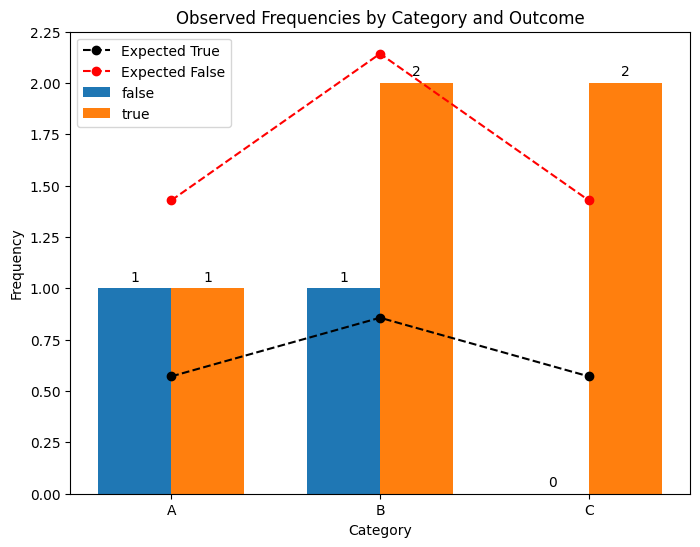

In [41]:
# Plot the observed and expected frequencies
categories = contingency_table.index
outcomes = contingency_table.columns

observed_freq = np.array(contingency_table)
expected_freq = np.array(expected)

width = 0.35
x = np.arange(len(categories))

fig, ax = plt.subplots(figsize=(8, 6))
rects1 = ax.bar(x - width/2, observed_freq[:, 0], width, label=outcomes[0])
rects2 = ax.bar(x + width/2, observed_freq[:, 1], width, label=outcomes[1])

ax.set_xlabel('Category')
ax.set_ylabel('Frequency')
ax.set_title('Observed Frequencies by Category and Outcome')
ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.legend()

# Add text labels for the observed frequencies
for i, rect in enumerate(rects1):
    height = rect.get_height()
    ax.annotate(f'{observed_freq[i, 0]}', xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3), textcoords='offset points', ha='center', va='bottom')

for i, rect in enumerate(rects2):
    height = rect.get_height()
    ax.annotate(f'{observed_freq[i, 1]}', xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3), textcoords='offset points', ha='center', va='bottom')

# Add a line plot for the expected frequencies
line = ax.plot(x, expected_freq[:, 0], marker='o', linestyle='--', color='black', label='Expected True')
line = ax.plot(x, expected_freq[:, 1], marker='o', linestyle='--', color='red', label='Expected False')
ax.legend()

plt.show()